In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib import colormaps

In [2]:
# Columnas y filas
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

In [3]:
# Importar DF
df = pd.read_csv('Berlin_Final.csv', index_col= 0)
df

,id,listing_url,last_scraped,source,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,bathrooms_text,amenities,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",within a few hours,f,prenzlauer berg,1 bath,"[""Iron"", ""Cleaning products"", ""Wifi"", ""Oven"", ...","['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,100.000000,80.000000,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,730.0,0,4,4,250,5.0,126,13230.0,4.63000,4.520000,4.920000,4.610000,0.76
1,9991,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",within a day,f,prenzlauer berg,2.5 baths,"[""Iron"", ""Wifi"", ""Babysitter recommendations"",...","['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.532690,13.418050,Entire rental unit,Entire home/apt,94.748079,93.375094,1.0,1.0,7.0,1.0,1.0,1.0,135.000000,6.0,14.0,6.0,14.0,0,0,5,193,7.0,0,0.0,5.00000,5.000000,4.860000,4.860000,0.06
2,14325,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany",within a day,t,prenzlauer berg,1 bath,"[""Hangers"", ""Wifi"", ""Coffee maker"", ""Host gree...","['email', 'phone', 'work_email']",t,t,prenzlauer berg nordwest,prenzlauer berg nordwest,Pankow,52.548130,13.403660,Entire rental unit,Entire home/apt,100.000000,93.375094,4.0,5.0,1.0,1.0,1.0,1.0,75.000000,150.0,1125.0,150.0,1125.0,0,0,0,262,26.0,0,0.0,4.68000,4.850000,4.600000,4.450000,0.14
3,16644,https://www.airbnb.com/rooms/16644,2025-06-21,previous scrape,In the Heart of Berlin - Kreuzberg,64696,https://www.airbnb.com/users/show/64696,Rene,2009-12-20,"Santa Cruz, CA",within a few hours,f,kreuzberg,1 bath,"[""Iron"", ""Hangers"", ""Wifi"", ""Hair dryer"", ""Pac...",['phone'],t,t,"Berlin, Germany",nördliche luisenstadt,Friedrichshain-Kreuzberg,52.503120,13.435080,Entire condo,Entire home/apt,100.000000,93.375094,4.0,4.0,4.0,1.0,1.0,2.0,173.672536,93.0,365.0,93.0,365.0,0,0,0,0,48.0,0,0.0,4.72000,4.860000,4.670000,4.710000,0.26
4,17904,https://www.airbnb.com/rooms/17904,2025-06-21,city scrape,Beautiful Kreuzberg studio - 3 months minimum,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,f,copacabana,1 bath,"[""Iron"", ""Wifi"", ""Free street parking"", ""Hot w...","['email', 'phone']",t,t,"Berlin, Germany",reuterstraße,Neukölln,52.494190,13.421660,Entire rental unit,Entire home/apt,100.000000,94.000000,2.0,5.0,2.0,1.0,1.0,1.0,28.000000,92.0,365.0,92.0,365.0,0,0,17,111,5.0,0,0.0,4.77000,4.710000,4.880000,4.650000,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,1446408006383528333,https://www.airbnb.com/rooms/1446408006383528333,2025-06-20,city scrape,cozy room,420514457,https://www.airbnb.com/users/show/420514457,H,2021-08-28,"Berlin, Germany",within an hour,f,gropiuss

In [4]:
# Revisar DF y crear copia a trabajar
df_extrac = df.copy()
df_extrac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14187 entries, 0 to 14186
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            14187 non-null  int64  
 1   listing_url                   14187 non-null  object 
 2   last_scraped                  14187 non-null  object 
 3   source                        14187 non-null  object 
 4   name                          14187 non-null  object 
 5   host_id                       14187 non-null  int64  
 6   host_url                      14187 non-null  object 
 7   host_name                     14187 non-null  object 
 8   host_since                    14174 non-null  object 
 9   host_location                 14187 non-null  object 
 10  host_response_time            14187 non-null  object 
 11  host_is_superhost             14187 non-null  object 
 12  host_neighbourhood            14187 non-null  object 
 13  bathro

**Extraer características estadísticas de un análisis univariado a variables categóricas**

Text(0, 0.5, 'Frecuencia')

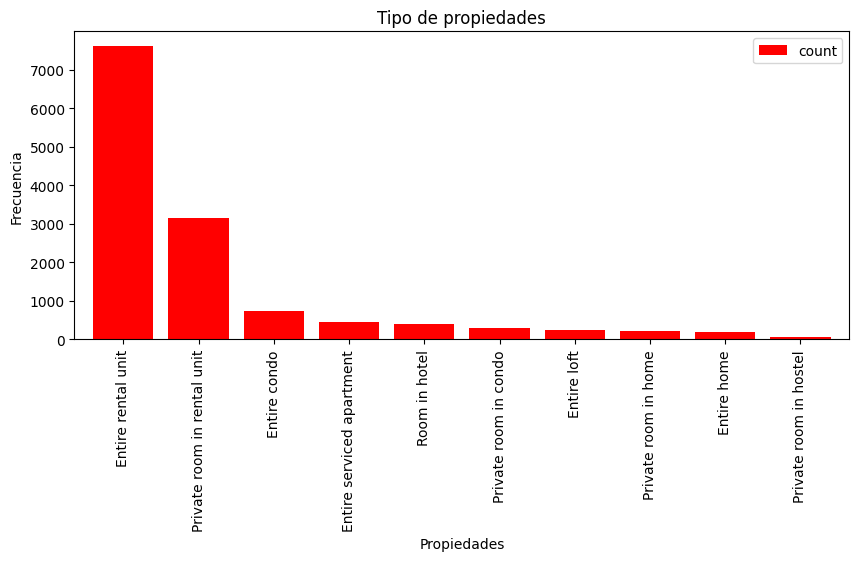

In [5]:
# 1. Análisis univariado property_type
Tabla_freq_prop = df_extrac['property_type'].value_counts().reset_index()
Tabla_freq_prop

# Filtro de valores más relevantes de la variable categórica
Filtro_prop = Tabla_freq_prop[Tabla_freq_prop['count'] > 65]
Filtro_prop

# Ajustar el índice del DF
Filtro_index_prop = Filtro_prop.set_index('property_type')
Filtro_index_prop

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_prop.plot(kind = 'bar', width = 0.8, figsize = (10,4), color = "red")
plt.title('Tipo de propiedades')
plt.xlabel('Propiedades')
plt.ylabel('Frecuencia')



Text(0, 0.5, 'Frecuencia')

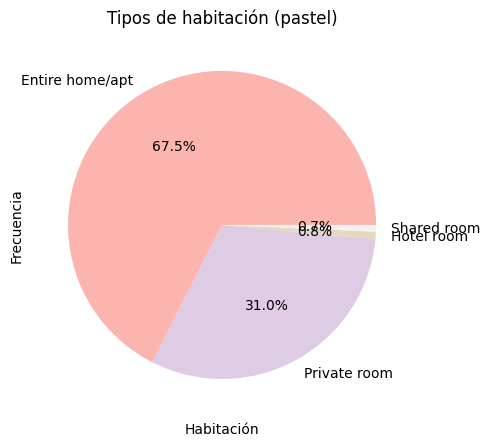

In [6]:
# 2. Análisis univariado room_type
Tabla_freq_room = df_extrac['room_type'].value_counts().reset_index()
Tabla_freq_room

# Filtro de valores más relevantes de la variable categórica
Filtro_room = Tabla_freq_room[Tabla_freq_room['count'] > 1]
Filtro_room

# Ajustar el índice del DF
Filtro_index_room = Filtro_room.set_index('room_type')
Filtro_index_room

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
# Gráfico de pastel del DF
Filtro_index_room['count'].plot(kind= 'pie', figsize= (10,5), shadow = False, autopct = "%0.1f%%", colormap = 'Pastel1')
plt.title('Tipos de habitación (pastel)')
plt.xlabel('Habitación')
plt.ylabel('Frecuencia')


Text(0, 0.5, 'Frecuencia')

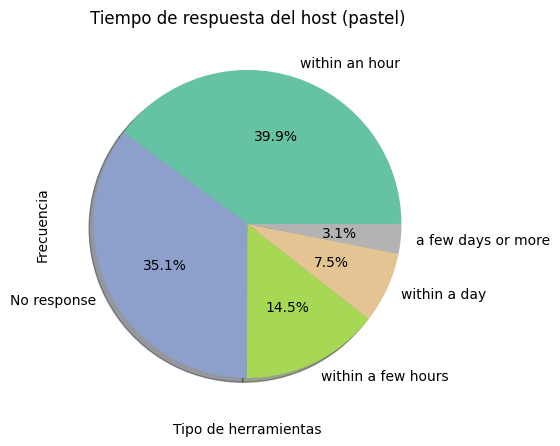

In [7]:
# 3. Análisis univariado host_response_time
Tabla_freq_time = df_extrac['host_response_time'].value_counts().reset_index()
Tabla_freq_time

# Filtro de valores más relevantes de la variable categórica
Filtro_time = Tabla_freq_time[Tabla_freq_time['count'] > 1]
Filtro_time

# Ajustar el índice del DF
Filtro_index_time = Filtro_time.set_index('host_response_time')
Filtro_index_time

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_time['count'].plot(kind= 'pie', figsize= (10,5), shadow = True, autopct = "%0.1f%%", colormap = 'Set2')
plt.title('Tiempo de respuesta del host (pastel)')
plt.xlabel('Tipo de herramientas')
plt.ylabel('Frecuencia')


Text(0, 0.5, 'Frecuencia')

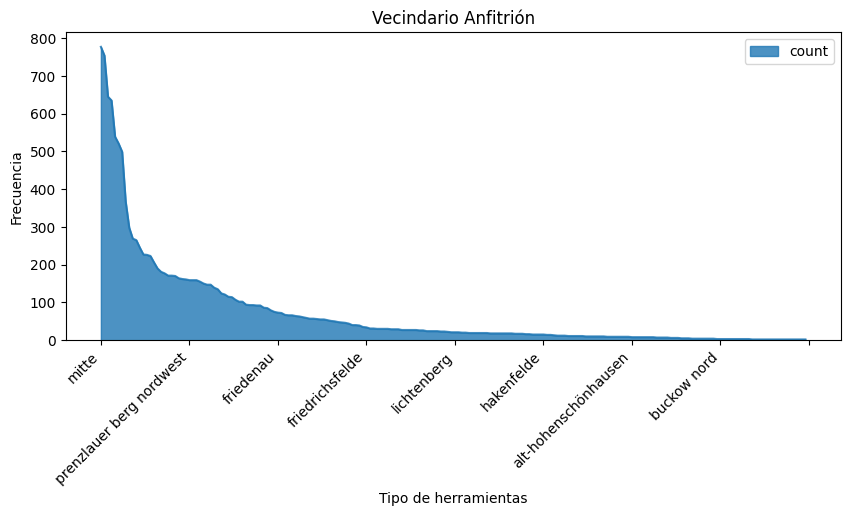

In [8]:
# 4. Análisis univariado host_neighbourhood 
Tabla_freq_neigh = df_extrac['host_neighbourhood'].value_counts().reset_index()
Tabla_freq_neigh

# Filtro de valores más relevantes de la variable categórica
Filtro_neigh = Tabla_freq_neigh[Tabla_freq_neigh['count'] > 1]
Filtro_neigh

# Ajustar el índice del DF
Filtro_index_neigh= Filtro_neigh.set_index('host_neighbourhood')
Filtro_index_neigh

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_neigh.plot(kind= 'area', figsize= (10,4), alpha = 0.8, colormap= 'tab10')
plt.title('Vecindario Anfitrión')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipo de herramientas')
plt.ylabel('Frecuencia')



Text(0, 0.5, 'Frecuencia')

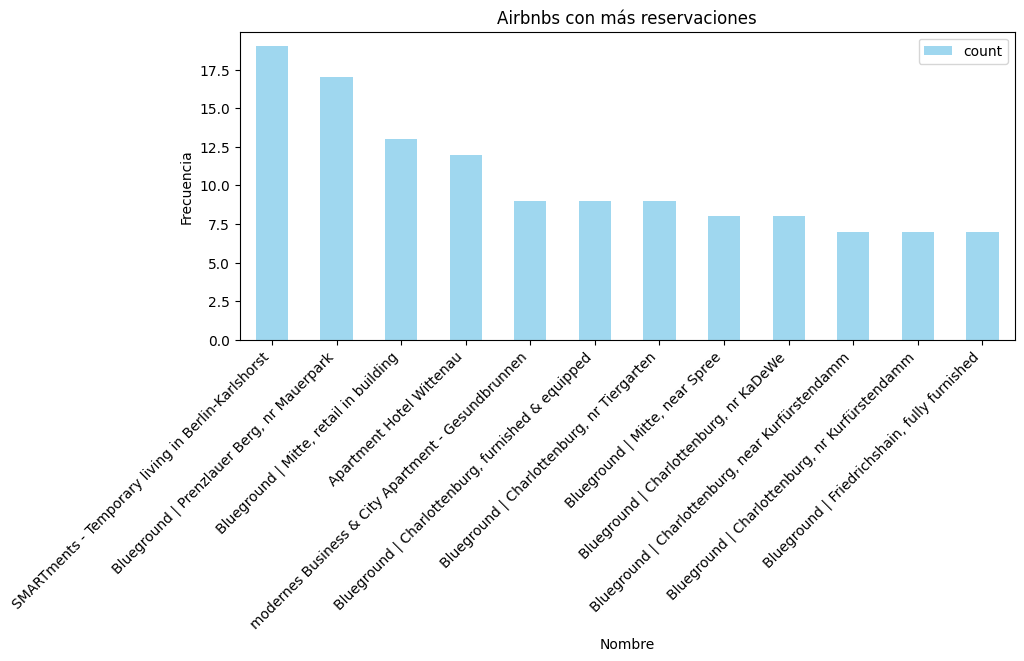

In [9]:
# 5. Análisis univariado 'name'
Tabla_freq_name = df_extrac['name'].value_counts().reset_index()
Tabla_freq_name

# Filtro de valores más relevantes de la variable categórica
Filtro_name = Tabla_freq_name[Tabla_freq_name['count'] > 6]
Filtro_name

# Ajustar el índice del DF
Filtro_index_name= Filtro_name.set_index('name')
Filtro_index_name

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_name.plot(kind= 'bar', figsize= (10,4), alpha = 0.8, color = 'skyblue')
plt.title('Airbnbs con más reservaciones')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')


Text(0, 0.5, 'Amenidades')

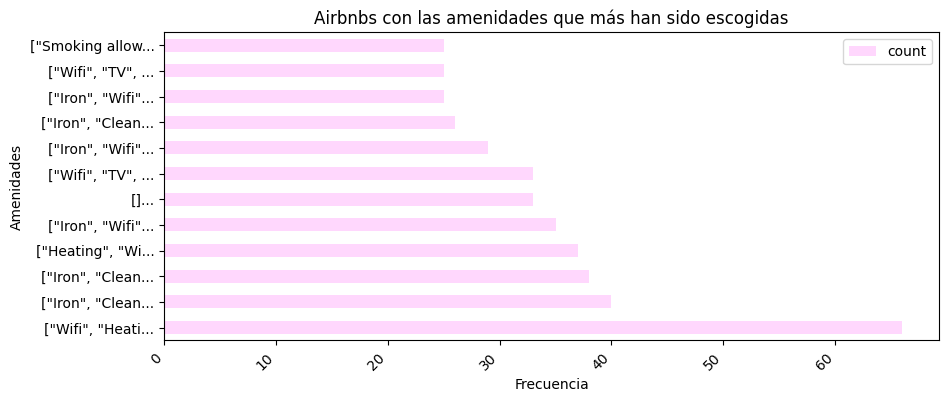

In [10]:
# 6. Análisis univariado 'amenities'
Tabla_freq_amenities = df_extrac['amenities'].value_counts().reset_index()
Tabla_freq_amenities

# Filtro de valores más relevantes de la variable categórica
Filtro_amenities = Tabla_freq_amenities[Tabla_freq_amenities['count'] > 23]
Filtro_amenities.head(11)

# Ajustar el índice del DF
Filtro_index_amenities= Filtro_amenities.set_index('amenities')
Filtro_index_amenities

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_amenities.index = Filtro_index_amenities.index.str.slice(0, 15) + "..."
Filtro_index_amenities.plot(kind= 'barh', figsize= (10,4), alpha = 0.8, colormap = 'vanimo')
plt.title('Airbnbs con las amenidades que más han sido escogidas')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Frecuencia')
plt.ylabel('Amenidades')




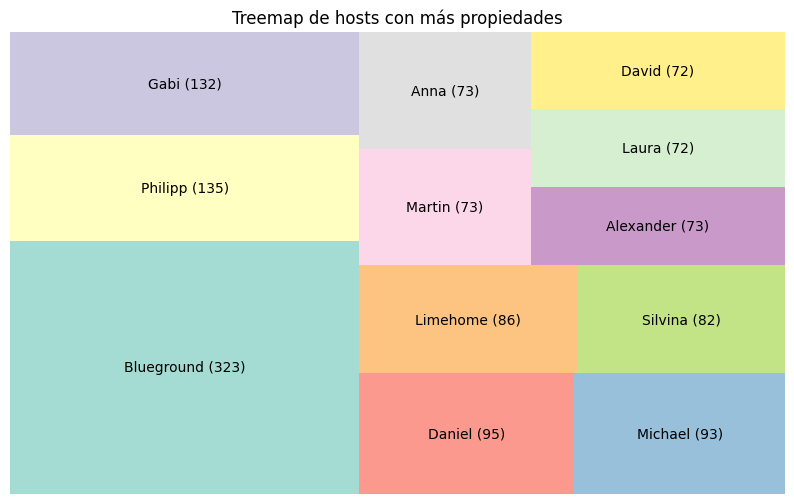

In [11]:
# 7. Análisis univariado 'host_name'
Tabla_freq_host_name = df_extrac['host_name'].value_counts().reset_index()
Tabla_freq_host_name

# Filtro de valores más relevantes de la variable categórica
Filtro_host_names = Tabla_freq_host_name[Tabla_freq_host_name['count'] >= 72]
Filtro_host_names.head(15)

# Ajustar el índice del DF
Filtro_index_host_names = Filtro_host_names.set_index('host_name')
Filtro_index_host_names

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
sizes = Filtro_index_host_names['count']
labels = Filtro_index_host_names.index + " (" + Filtro_index_host_names['count'].astype(str) + ")"

# Gráfica
plt.figure(figsize=(10,6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.Set3.colors)
plt.title("Treemap de hosts con más propiedades")
plt.axis("off")
plt.show()




Text(0, 0.5, 'Frecuencia')

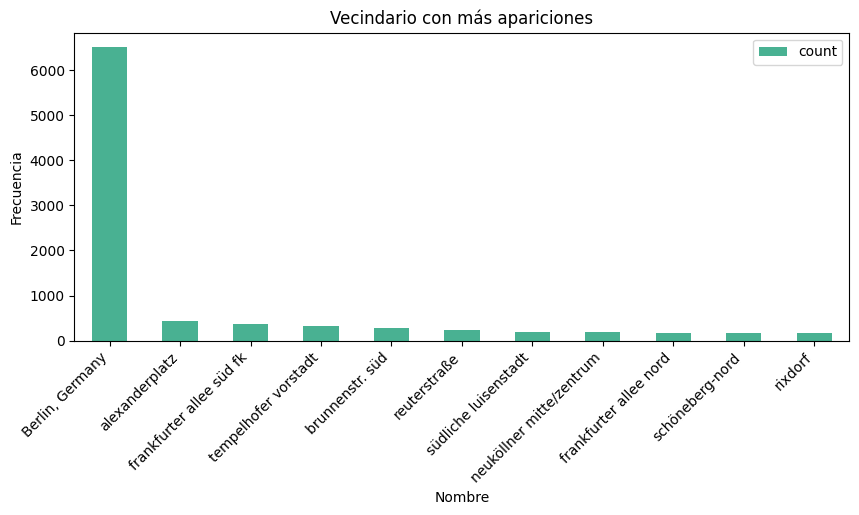

In [12]:
# 8. Análisis univariado 'neighbourhood'
Tabla_freq_neighbourhood = df_extrac['neighbourhood'].value_counts().reset_index()
Tabla_freq_neighbourhood

# Filtro de valores más relevantes de la variable categórica
Filtro_host_neighbourhood = Tabla_freq_neighbourhood[Tabla_freq_neighbourhood['count'] > 164]
Filtro_host_neighbourhood.head(10)

# Ajustar el índice del DF
Filtro_index_neighbourhood = Filtro_host_neighbourhood.set_index('neighbourhood')
Filtro_index_neighbourhood

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_neighbourhood.plot(kind= 'bar', figsize= (10,4), alpha = 0.8, colormap = 'Dark2')
plt.title('Vecindario con más apariciones')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

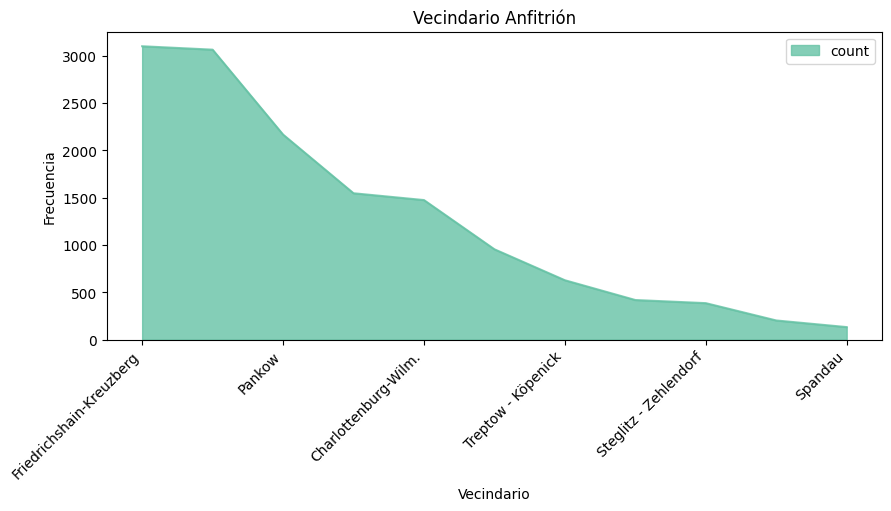

In [13]:
# 9. Análisis univariado 'neighbourhood_group_cleansed'
Tabla_freq_cleansed = df_extrac['neighbourhood_group_cleansed'].value_counts().reset_index()
Tabla_freq_cleansed

# Filtro de valores más relevantes de la variable categórica
Filtro_cleansed = Tabla_freq_cleansed[Tabla_freq_cleansed['count'] > 121]
Filtro_cleansed

# Ajustar el índice del DF
Filtro_index_cleansed = Filtro_cleansed.set_index('neighbourhood_group_cleansed')
Filtro_index_cleansed

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_cleansed.plot(kind= 'area', figsize= (10,4), alpha = 0.8, colormap= 'Set2')
plt.title('Vecindario Anfitrión')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vecindario')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

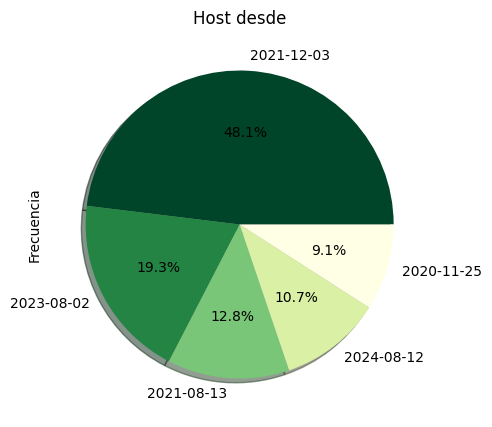

In [14]:
# 10. Análisis univariado host_since
Tabla_freq_since = df_extrac['host_since'].value_counts().reset_index()
Tabla_freq_since

# Filtro de valores más relevantes de la variable categórica
Filtro_time_since = Tabla_freq_since[Tabla_freq_since['count'] > 1].head(5)
Filtro_time_since

# Ajustar el índice del DF
Filtro_index_since = Filtro_time_since.set_index('host_since')
Filtro_index_since

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_since['count'].plot(kind= 'pie', figsize= (10,5), shadow = True, autopct = "%0.1f%%", colormap = 'YlGn_r')
plt.title('Host desde')
plt.ylabel('Frecuencia')

In [15]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

**Categorizar variables cuantitativas**

In [28]:
#host_response_rate
# Calculamos el número total de la población "n"
df_extrac['host_response_rate'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_resp = df_extrac['host_response_rate'].max()
Min_resp = df_extrac['host_response_rate'].min()
Limites = [Min_resp, Max_resp]
print(Limites)

# Rango R
R_resp = Max_resp - Min_resp
print("Rango:", R_resp)

# Calculamos el número de intervalos de la clase "ni" con regla de Sturges
import numpy as np
ni_resp = 1 + 3.32*np.log10(n)
print("Número de intervalos (Sturges):", ni_resp)

# Calculamos el ancho del intervalo "i"
i_resp = R_resp / ni_resp
print("Ancho del intervalo:", i_resp)

# Definimos edges → 16 edges para 15 intervalos
intervalos_resp = np.linspace(72.99, 100.01, 16)

# Creamos categorías, con toque DE/EN
categorias_resp = [
    "Sehr gering | Very low (73.00 - 74.83%)",
    "Eingeschränkt | Limited (74.83 - 76.66%)",
    "Niedrig | Low (76.66 - 78.49%)",
    "Langsam | Slow (78.49 - 80.32%)",
    "Mäßig-niedrig | Mod.-low (80.32 - 82.15%)",
    "Mittel | Moderate (82.15 - 83.98%)",
    "Solide | Solid (83.98 - 85.81%)",
    "Akzeptabel | Acceptable (85.81 - 87.64%)",
    "Zufriedenst. | Satisfactory (87.64 - 89.47%)",
    "Hoch | High (89.47 - 91.30%)",
    "Zuverlässig | Reliable (91.30 - 93.13%)",
    "Sehr hoch | Very high (93.13 - 94.96%)",
    "Vertrauensw. | Trustworthy (94.96 - 96.79%)",
    "Exzellent | Excellent (96.79 - 98.62%)",
    "Spitzenklasse | Premium (98.62 - 100.0%)"
]

# Creando las categorías en una NUEVA columna
df_extrac['host_response_rate_cat'] = pd.cut(x=df_extrac['host_response_rate'], bins=intervalos_resp, labels=categorias_resp,
    include_lowest=True, right=False
)

df_extrac[['host_response_rate', 'host_response_rate_cat']].head(20)



<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(73.0), np.float64(100.0)]
Rango: 27.0
Número de intervalos (Sturges): 14.784276688200496
Ancho del intervalo: 1.8262645220614016


,host_response_rate,host_response_rate_cat
0,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
1,94.748079,Vertrauensw. | Trustworthy (94.96 - 96.79%)
2,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
3,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
4,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
5,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
6,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
7,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
8,88.880000,Zufriedenst. | Satisfactory (87.64 - 89.47%)
9,88.880000,Zufriedenst. | Satisfactory (87.64 - 89.47%)


In [17]:
#host_acceptance_rate
#Calculamos el número total de la población "n"
df_extrac['host_acceptance_rate'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_accep = df_extrac['host_acceptance_rate'].max() #72
Min_accep  = df_extrac['host_acceptance_rate'].min() #100
Limites_accep = [Min_accep, Max_accep]
print(Limites_accep)

# Rango R
R_accep = Max_accep - Min_accep
print("Rango: ",R_accep) #28

# Calculamos el número de intervalos de la calse "ni", aplicando regla de Sturges
ni_accep = 1+3.32*np.log10(n)
print("Número de intervalos (Sturges): ",ni_accep) #14.78

# Calculamos el ancho del intervalo "i"
i_accep = R_accep/ni_accep
print("Ancho del intervalo: ",i_accep) #1.89

intervalos_accep = np.linspace(71.99, 100.01,16) # se le resta un decimal al del inicio y se le suma un decimal al final
print(intervalos_accep)

# Creamos categorías, deben ser en base a la naturaleza de la columna
categorias_accep = ["Sehr niedrig | Very low (72.00 - 73.89%)",
    "Eingeschränkt | Limited (73.89 - 75.78%)",
    "Niedrig | Low (75.78 - 77.67%)",
    "Selektiv | Selective (77.67 - 79.56%)",
    "Mäßig-niedrig | Mod.-low (79.56 - 81.45%)",
    "Mittel | Moderate (81.45 - 83.34%)",
    "Ausgewogen | Balanced (83.34 - 85.23%)",
    "Akzeptabel | Acceptable (85.23 - 87.12%)",
    "Zufriedenst. | Satisfactory (87.12 - 89.01%)",
    "Hoch | High (89.01 - 90.90%)",
    "Zuverlässig | Reliable (90.90 - 92.79%)",
    "Sehr hoch | Very high (92.79 - 94.68%)",
    "Großzügig | Generous (94.68 - 96.57%)",
    "Exzellent | Excellent (96.57 - 98.46%)",
    "Spitzenklasse | Premium (98.46 - 100.00%)"]

# Creando las categorias en la columna
df_extrac['host_acceptance_rate_cat'] = pd.cut(x = df_extrac['host_acceptance_rate'], bins = intervalos_accep, labels = categorias_accep)
df_extrac[['host_acceptance_rate', 'host_acceptance_rate_cat']].head(20)




<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(72.0), np.float64(100.0)]
Rango:  28.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  1.8939039488044165
[ 71.99   73.858  75.726  77.594  79.462  81.33   83.198  85.066  86.934
  88.802  90.67   92.538  94.406  96.274  98.142 100.01 ]


,host_acceptance_rate,host_acceptance_rate_cat
0,80.000000,Mäßig-niedrig | Mod.-low (79.56 - 81.45%)
1,93.375094,Sehr hoch | Very high (92.79 - 94.68%)
2,93.375094,Sehr hoch | Very high (92.79 - 94.68%)
3,93.375094,Sehr hoch | Very high (92.79 - 94.68%)
4,94.000000,Sehr hoch | Very high (92.79 - 94.68%)
5,93.375094,Sehr hoch | Very high (92.79 - 94.68%)
6,93.375094,Sehr hoch | Very high (92.79 - 94.68%)
7,97.000000,Exzellent | Excellent (96.57 - 98.46%)
8,89.890000,Hoch | High (89.01 - 90.90%)
9,89.890000,Hoch | High (89.01 - 90.90%)


In [ ]:
#host_total_listings_count



In [19]:
#accomodates

In [20]:
#bathrooms

In [21]:
#beds

In [22]:
#price

In [23]:
#maximum_nights_avg_ntm

In [24]:
#availability_365

In [25]:
#number_of_reviews

In [26]:
#review_scores_value

In [27]:
#reviews_per_month